In [2]:
%matplotlib inline
import networkx as nx
import statistics
from collections import Counter
import matplotlib.pyplot as plt
import random
import community as community_louvain
import matplotlib.cm as cm

C:\Users\TheGenius\AppData\Local\Temp\ipykernel_10328\621428855.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 4039 nodes and 88234 edges


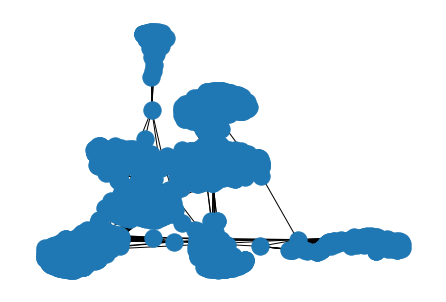

In [3]:
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)
print(nx.info(G))
nx.draw(G)

(-0.5868836268782616,
 0.46154656261205673,
 -1.013181530535221,
 1.1912977924942971)

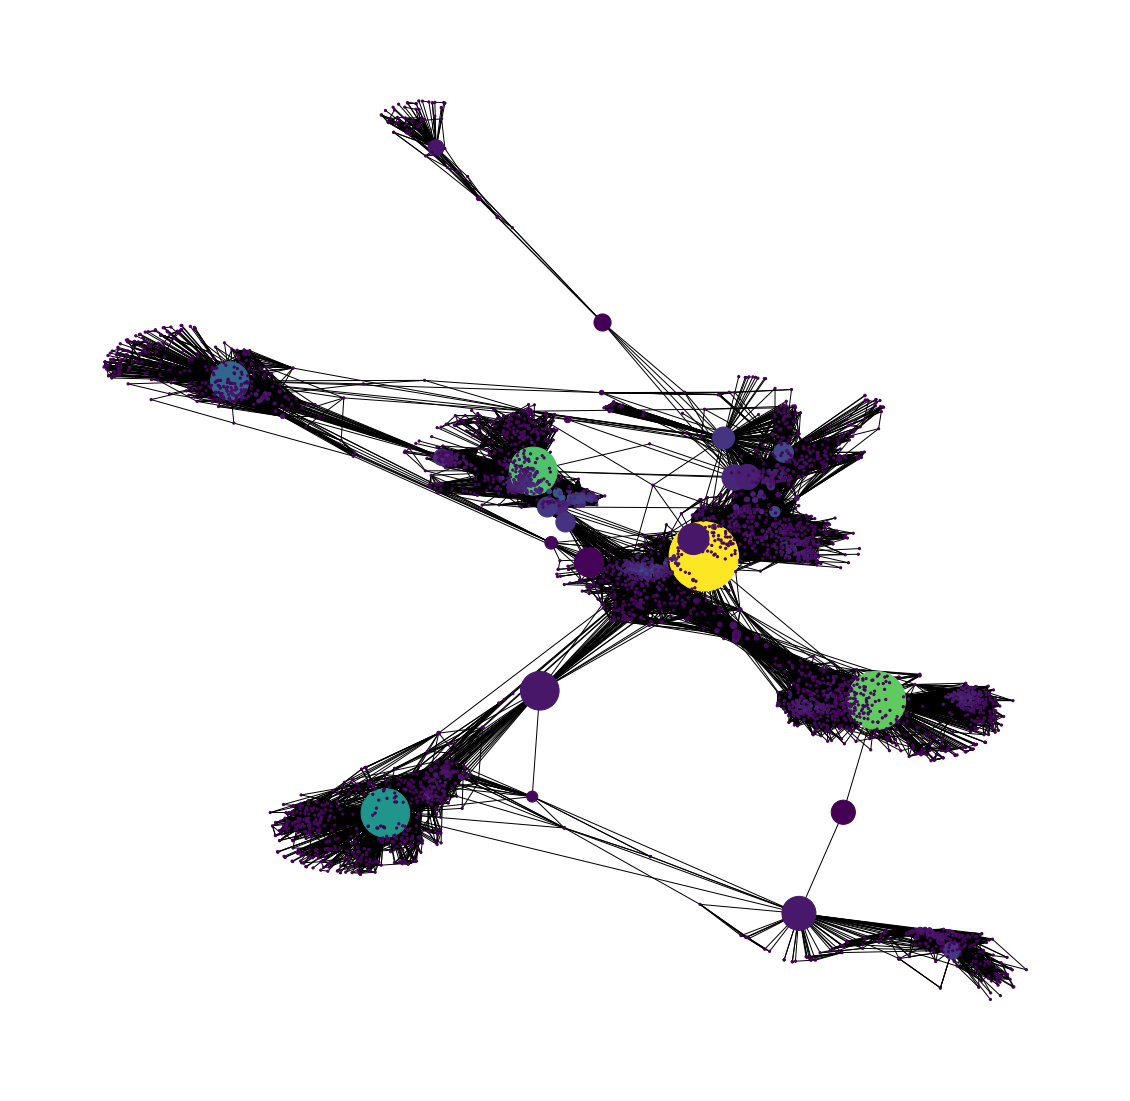

In [4]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [6]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

107

In [7]:
G.degree(highest_degree_node)


1045

In [8]:
degree_sequence = [G.degree(n) for n in G.nodes]
print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 43.69101262688784
Median degree: 25


In [9]:
degree_counts = Counter(degree_sequence)
degree_counts

Counter({347: 1,
         17: 76,
         10: 95,
         13: 79,
         6: 98,
         20: 63,
         8: 111,
         57: 23,
         1: 75,
         31: 38,
         15: 106,
         9: 100,
         16: 82,
         65: 20,
         11: 81,
         69: 14,
         68: 16,
         5: 93,
         23: 53,
         2: 98,
         44: 21,
         24: 60,
         12: 82,
         22: 63,
         4: 99,
         7: 98,
         78: 11,
         19: 72,
         3: 93,
         26: 56,
         76: 15,
         14: 87,
         34: 43,
         21: 52,
         49: 33,
         32: 44,
         1045: 1,
         37: 43,
         40: 27,
         36: 43,
         62: 16,
         63: 23,
         18: 73,
         28: 37,
         133: 3,
         43: 29,
         25: 55,
         38: 44,
         46: 24,
         41: 29,
         48: 24,
         47: 24,
         30: 40,
         39: 29,
         27: 49,
         59: 11,
         73: 10,
         45: 19,
         55: 23,
  

<BarContainer object of 1045 artists>

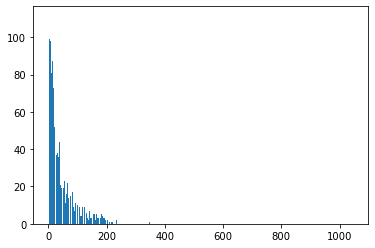

In [10]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [11]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())
print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.0006669573568730229
Median betweenness: 2.918299820622971e-06


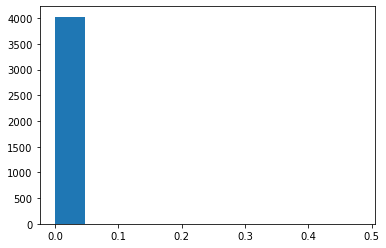

In [16]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

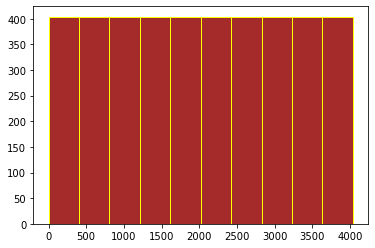

In [19]:
plt.hist(G,edgecolor="yellow", color="brown", bins=10)
plt.show()

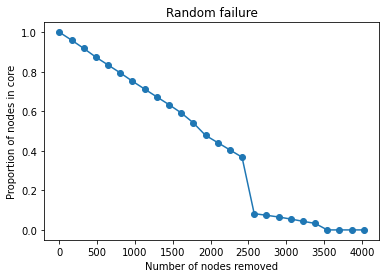

In [20]:
C = G.copy()
import random
nodes_to_remove = random.sample(list(C.nodes), 2)
C.remove_nodes_from(nodes_to_remove)
number_of_steps = 25
M = G.number_of_nodes() // number_of_steps
M
num_nodes_removed = range(0, G.number_of_nodes(), M)
N = G.number_of_nodes()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

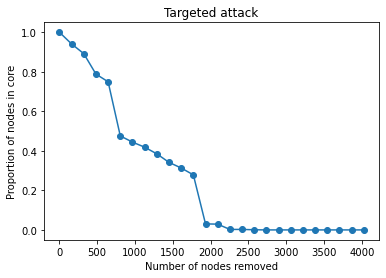

In [21]:
N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')

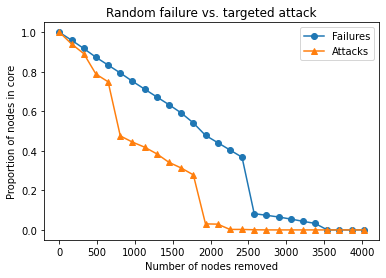

In [22]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o', label='Failures')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='^', label='Attacks')
plt.legend()

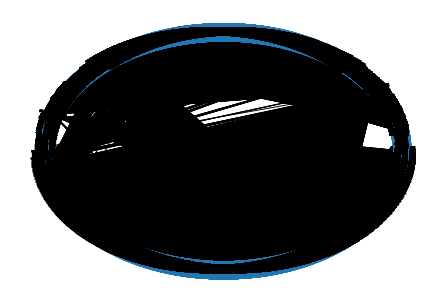

In [23]:
k = 4
for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True)

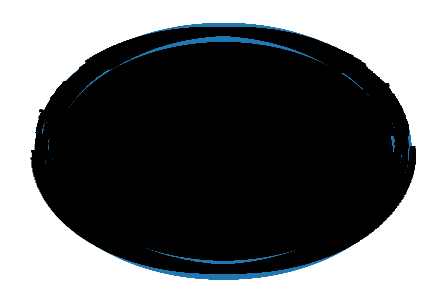

In [24]:
p = 0.1
for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True)

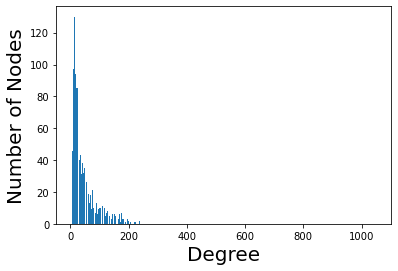

In [25]:
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)



#################################

def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()

In [26]:
A = nx.adjacency_matrix(G)
print(A.todense())

C:\Users\TheGenius\AppData\Local\Temp\ipykernel_10328\960885711.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


[[0 1 1 ... 0 1 1]
 [1 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 1 1 0]]


In [27]:
Adj = nx.adjacency_matrix(G).todense()
Adj

C:\Users\TheGenius\AppData\Local\Temp\ipykernel_10328\3901564670.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Adj = nx.adjacency_matrix(G).todense()


matrix([[0, 1, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [1, 1, 0, ..., 1, 1, 0]], dtype=int32)

(-1.1982667186856268,
 1.086521182358265,
 -1.1424109548330308,
 1.037859520316124)

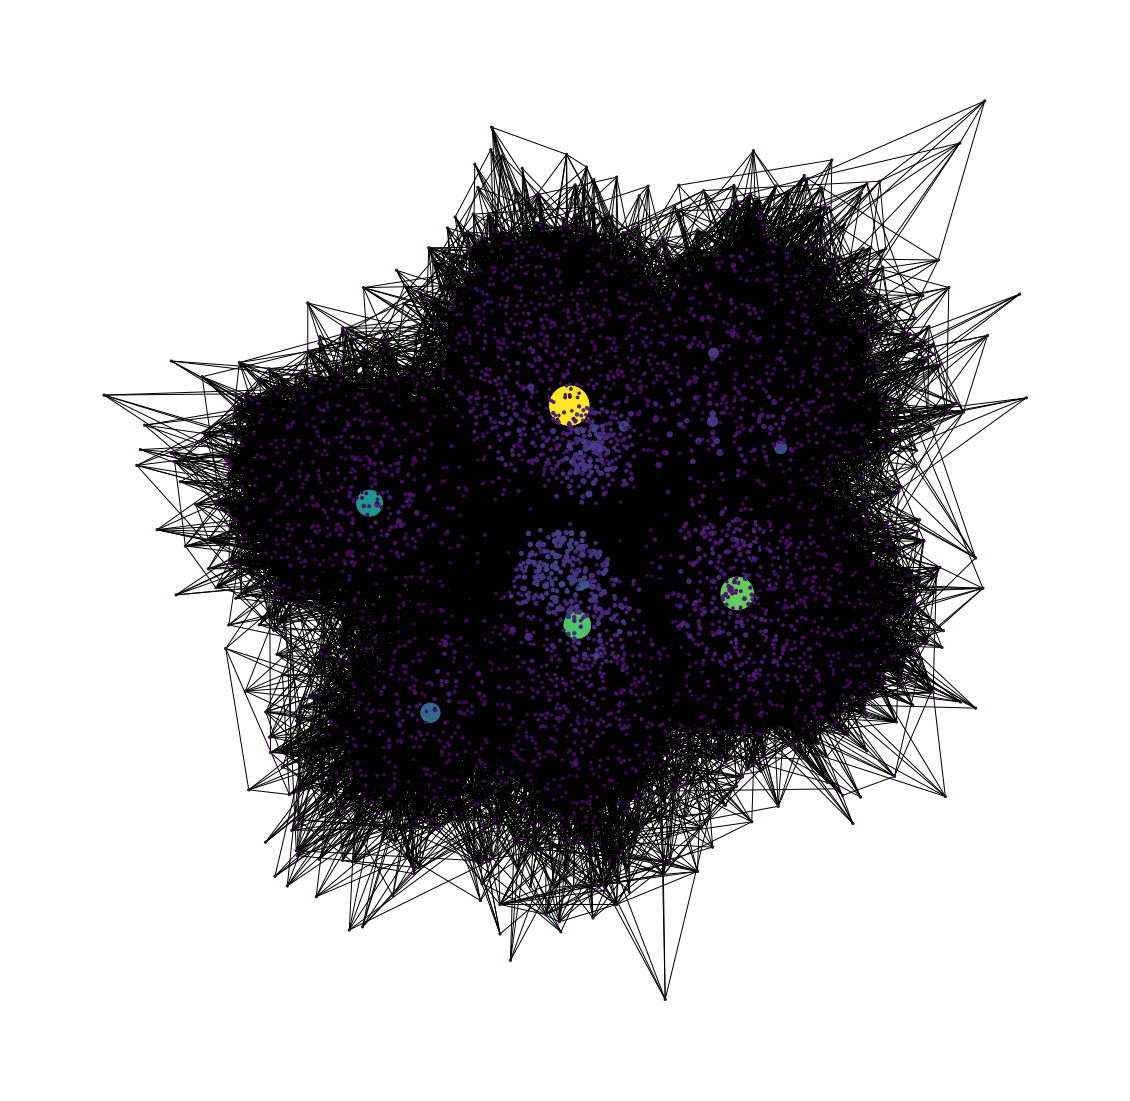

In [28]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

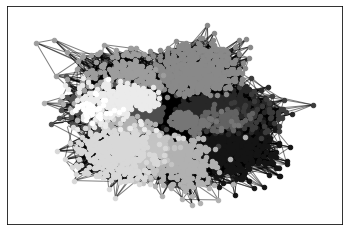

In [31]:
partition = community_louvain.best_partition(G)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0

for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

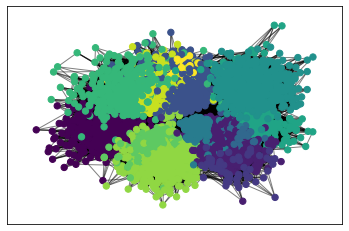

In [32]:
partion = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()